Лабораторная работа 1

Тема: О росте больных ковидом

Вариант 6 (сдвиг на 2 месяца)

Возьмите открытые данные о росте числа зараженных COVID-19 в мире за три месяца. Первый месяц из трех определяется сдвигом на номер по списку с февраля 2020 года. Проверьте гипотезу о том, что этот рост описывается экспоненциальной функцией. Полученное р-значение сравните с уровнем значимости 0,05.

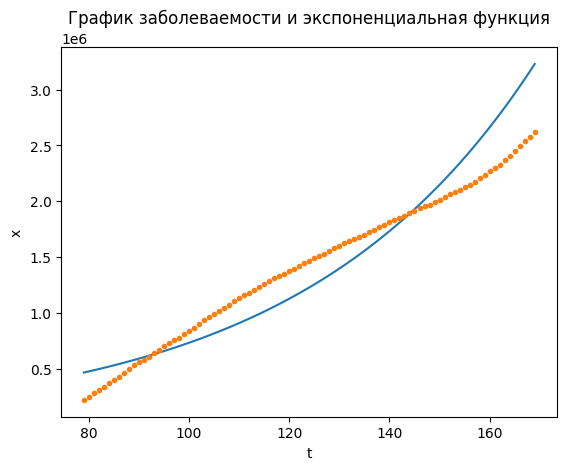

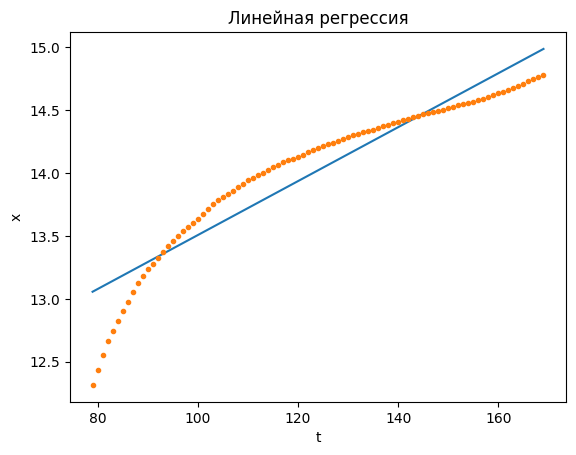

K = 0.9419274856635396 p = 5.949288630770426e-44


In [37]:
import pandas as pd
import numpy as np
import datetime
import scipy
import matplotlib.pyplot as plt

df = pd.read_csv('national-history.csv', sep=',')
df=df.iloc[::-1].reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.loc[(df['date'] >= '2020-04-01')
                     & (df['date'] < '2020-07-01')]
df = df[["date", "positive"]]
df["y"] = np.log(df["positive"])

b, a = np.polyfit(df.index.values, df["y"], 1)

K, p = scipy.stats.pearsonr(df["y"],
  [b * index + a for index in df.index.values])

plt.title("График заболеваемости и экспоненциальная функция")
plt.xlabel("t")
plt.ylabel("x")

x = df.index.values

plt.plot(x, np.exp(b * x + a), x, df["positive"], ".")

plt.show()

plt.title("Линейная регрессия")
plt.xlabel("t")
plt.ylabel("x")

x = df.index.values

plt.plot(x, b * x + a, x, df["y"], ".")

plt.show()

print("K =", K, "p =", p)


K близок к 1, что говорит о сильной линейной зависимости. Кроме того значение p крайне мало. Очень маленькое р-значение чуть
меньше $6 \cdot 10 ^ {-44}$ – это вероятность случайной величины, распределенной по Стьюденту с 91 - 2 = 89
степенями свободы принять значение по модулю больше 𝑇 ≈ 1,98.